---

# Credit Card Fraud Detection
---

https://www.kaggle.com/datasets/willianoliveiragibin/high-fidelity-fraudulent-activity-2023/data

| **Column Name** | **Description**                                             |
| --------------- | ----------------------------------------------------------- |
| ID              | Likely a unique identifier for a specific credit card transaction. |
| V1 - V28        | Features or attributes associated with the credit card transaction, potentially including information such as time, amount, location, and transaction type. |
| Amount          | The monetary value involved in the credit card transaction, indicating the amount of money charged or credited to the card. |
| Class           | Indicates the category or type of the transaction, classifying it as 'fraudulent' or 'legitimate' for fraud detection. |

# Import Libraries

In [14]:
import pandas as pd
import numpy as np 

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Deep Learning stuff
import tensorflow as tf
from tensorflow import keras

# Classifiers
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import recall_score, f1_score, precision_score

# Explore the Data

In [15]:
%%time
fd = pd.read_csv('creditcard_2023.csv')
fd.sample(5)

CPU times: total: 453 ms
Wall time: 1.68 s


,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
470464,470464,-0.689345,-0.601922,-0.597841,0.429308,0.031936,-0.247819,-0.447187,0.169215,-0.373029,...,0.205628,0.883336,0.868387,0.058087,-1.803576,-1.667009,0.970919,0.128327,23226.79,1
330205,330205,-1.531546,1.238541,-1.414628,1.580299,-1.750551,-1.614500,-1.767727,1.747585,-2.145211,...,0.805380,-0.177371,-0.492072,1.132597,0.020497,0.717270,-0.382576,-0.754067,5928.52,1
564896,564896,0.048199,-0.384719,-0.400880,-0.119725,-0.052704,-0.521743,0.358823,-0.108098,0.180335,...,0.080351,-0.245716,0.214379,-0.465808,0.297418,0.270773,-0.057477,0.169542,4181.66,1
64798,64798,-0.532043,0.256071,0.267721,-1.725219,0.012135,0.284635,0.272207,0.158996,0.937395,...,-0.196927,-0.468203,-0.022014,-1.353130,0.301204,1.597170,0.074143,-0.089595,1082.50,0
118360,118360,1.007141,-0.210198,0.295314,-0.163071,0.412453,0.051119,0.527252,-0.180990,0.236790,...,-0.114270,-0.041511,-0.210869,-0.161855,1.155124,-0.782696,-0.195600,0.010778,13185.48,0


In [16]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [17]:
fd.isnull().sum()
# no null values

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

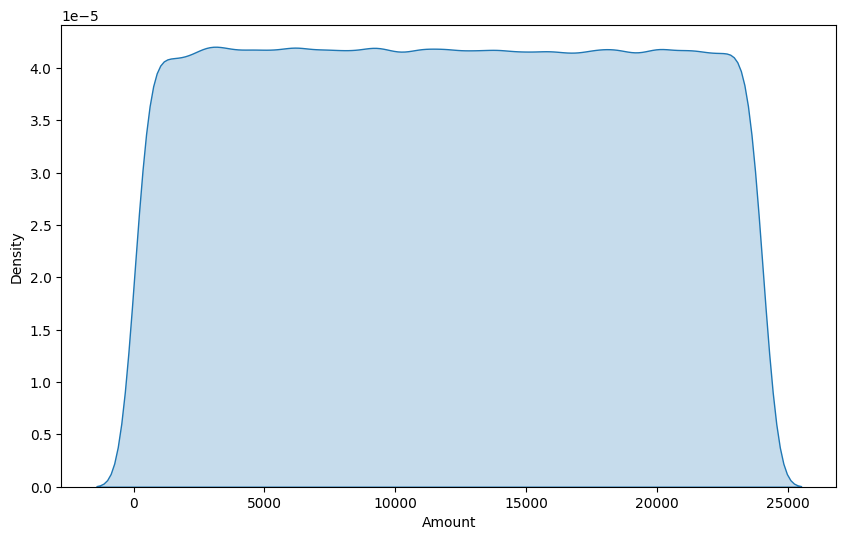

In [18]:
plt.figure(figsize=(10,6))
sns.kdeplot(data = fd, x = 'Amount', fill = True)
plt.show()

# Data Split and Scaling

In [19]:
X = fd.drop(['id', 'Class'], axis = 1)
y = fd.Class

In [20]:
y.value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

In [21]:
scaler1 = MinMaxScaler()
X_scaled_MM = scaler1.fit_transform(X)

scaler2 = StandardScaler()
X_scaled_SS = scaler2.fit_transform(X)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_MM, y, test_size=0.25, random_state=42)

# Cross-Validation

In [23]:
# %%time
# models = [
#     ('Logistic Regression', LogisticRegression(max_iter=1000)),
#     ('Random Forest', RandomForestClassifier()),
#     ('SVM', SVC()),
#     ('Gradient Boosting', GradientBoostingClassifier()),
#     ('Decision Tree', DecisionTreeClassifier())
# ]

# # Metrics to be calculated
# scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# # Iterating through each model and performing cross-validation
# for name, model in models:
#     results = cross_validate(model, X_train, y_train, cv=5, scoring=scoring)
    
#     print("====================")
#     print(f'{name}:')
#     print(f"  Accuracy: {results['test_accuracy'].mean():.2f}")
#     print(f"  Precision: {results['test_precision'].mean():.2f}")
#     print(f"  Recall: {results['test_recall'].mean():.2f}")
#     print(f"  F1 Score: {results['test_f1'].mean():.2f}")
#     print(f"  ROC AUC: {results['test_roc_auc'].mean():.2f}")
#     print("====================")

---
#### Logistic Regression:
- Accuracy: 0.96
- Precision: 0.98
- Recall: 0.94
- F1 Score: 0.96
- ROC AUC: 0.99
---
#### Random Forest:
- Accuracy: 1.00
- Precision: 1.00
- Recall: 1.00
- F1 Score: 1.00
- ROC AUC: 1.00
---
#### SVM:
- Accuracy: 0.97
- Precision: 0.99
- Recall: 0.96
- F1 Score: 0.97
- ROC AUC: 1.00
---
#### Gradient Boosting:
- Accuracy: 0.98
- Precision: 0.99
- Recall: 0.97
- F1 Score: 0.98
- ROC AUC: 1.00
---
#### Decision Tree:
- Accuracy: 1.00
- Precision: 1.00
- Recall: 1.00
- F1 Score: 1.00
- ROC AUC: 1.00
---
CPU times: total: 2h 44min 52s <br>
Wall time: 3h 42min 13s

In [24]:
X.isnull().any()

V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
dtype: bool

In [25]:
model_1 = RandomForestClassifier()
# model_2 = DecisionTreeClassifier()

In [26]:
%%time
model_1.fit(X_train, y_train)

# Accidently pressed M on this cell, it takes 8 mins to fit the model

CPU times: total: 2min 21s
Wall time: 7min 44s


RandomForestClassifier()

In [27]:
%%time
from sklearn.metrics import accuracy_score
y_pred = model_1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy,2)*100)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 100.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71023
           1       1.00      1.00      1.00     71135

    accuracy                           1.00    142158
   macro avg       1.00      1.00      1.00    142158
weighted avg       1.00      1.00      1.00    142158

CPU times: total: 125 ms
Wall time: 1.28 s


In [28]:
print(confusion_matrix(y_test, y_pred))

[[71004    19]
 [    0 71135]]


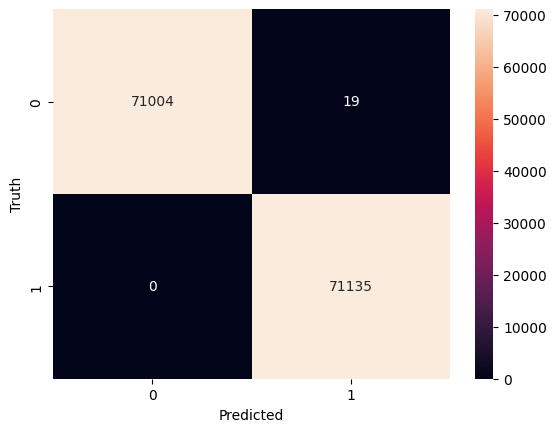

In [29]:
cm = tf.math.confusion_matrix(labels = y_test, predictions= y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

The results are tight, achieving high accuracy and effectively identifying both positive and negative instances. The absence of false negatives is particularly noteworthy.